In [88]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten, Dropout
import seaborn as sns
import xgboost as xgb
from xgboost import XGBClassifier



dataset = pd.read_csv('../input/diabetes.csv')
X = dataset.iloc[:, 0:8].values
y = dataset.iloc[:, 8].values
xd = pd.DataFrame(data=X)
yd = pd.DataFrame(data = y)





In [34]:
xd = pd.DataFrame(data = X)
yd = pd.DataFrame(data = y)


# Creating Visualizations

## Generating Pairplot of the dataset

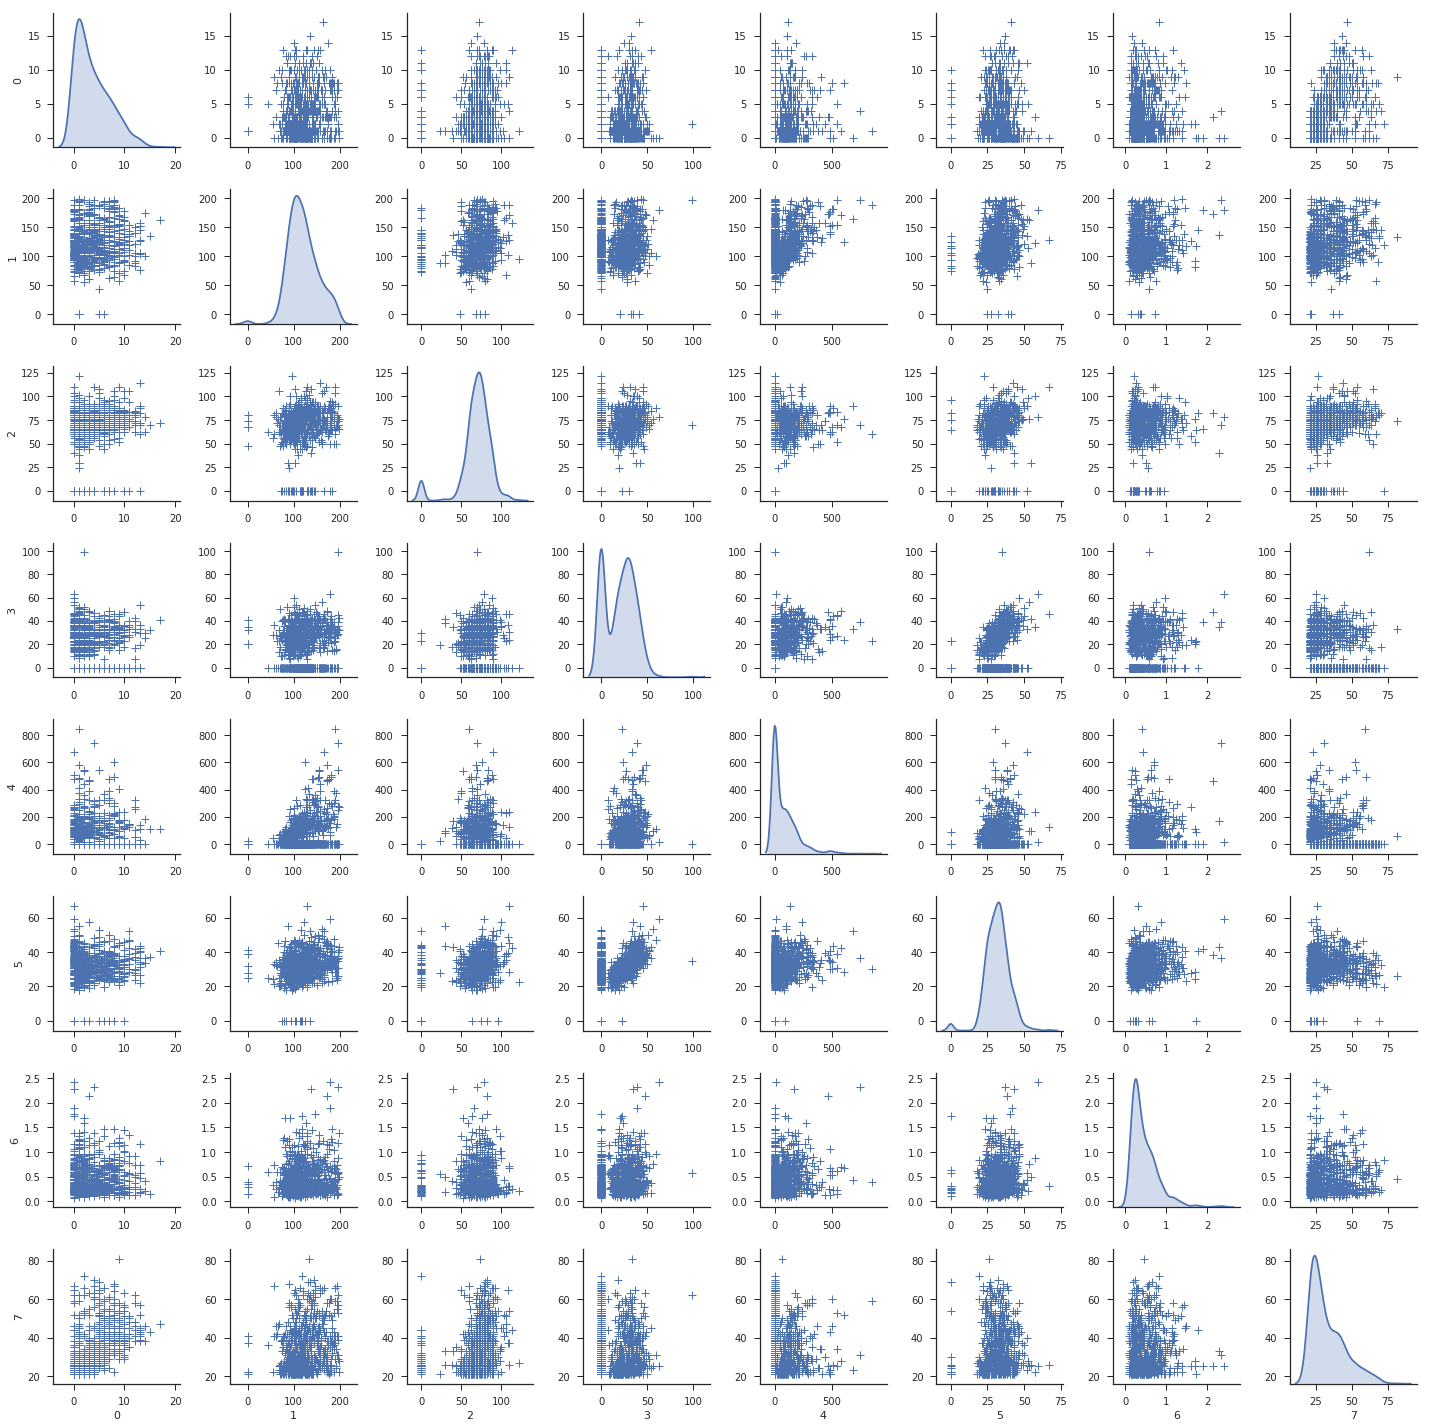

In [35]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(xd, diag_kind="kde", markers="+",plot_kws=dict(s=50, edgecolor="p", linewidth=1),diag_kws=dict(shade=True))
plt.show()

## Finding the Mean and Visualizing the distribution of the BMI label 

Mean: 31.992578124999977


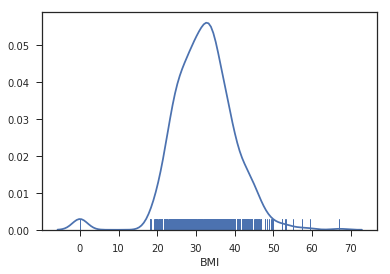

In [42]:
sns.distplot(df['BMI'], hist=False, rug=True);
mean =  np.mean(df['BMI'])
print("Mean: {}".format(mean))


## Visualizing a joint pairplot between BMI and Diabetes Pedigree Function for delineating a relationship between the two labels.

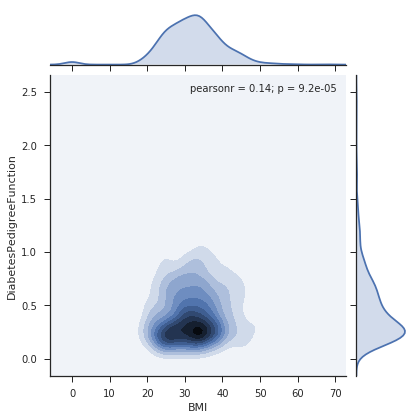

In [38]:
sns.jointplot(x=df['BMI'], y=df['DiabetesPedigreeFunction'], data=df, kind="kde");


## When Outcome is 0, the various labels can be represented in eight subplots. 

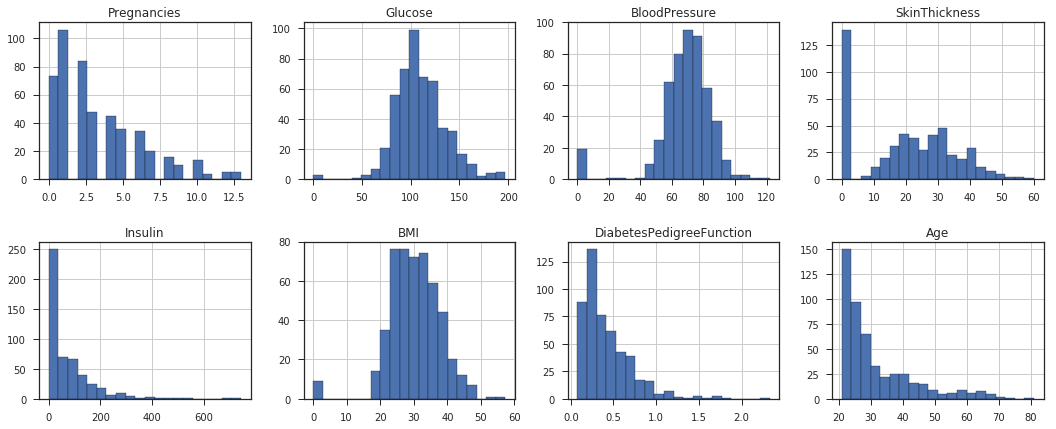

In [43]:
columns=df.columns[:8]
df1=df[df['Outcome']==0]
plt.subplots(figsize=(18,15))
length = len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),4,j+1)
    plt.subplots_adjust(wspace=0.25,hspace=0.4)
    df1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

## Similarly, when the output is 1, the labels can be visualized again. 

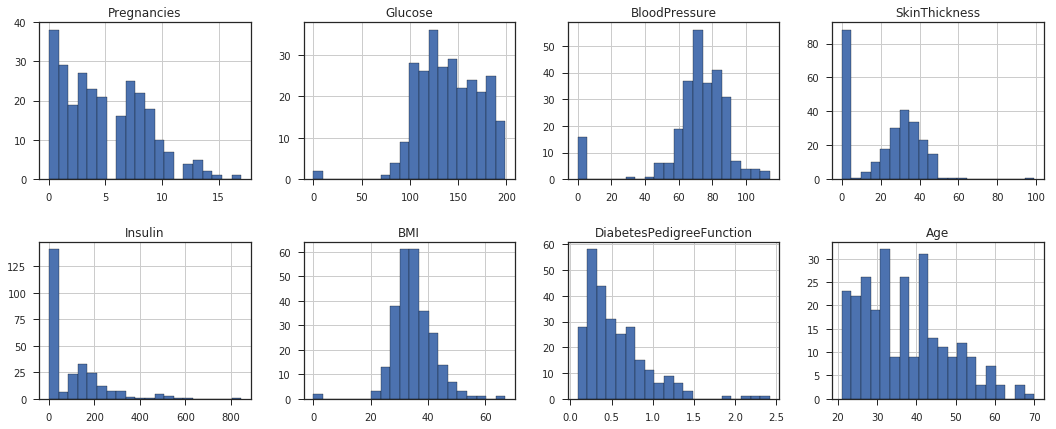

In [44]:
df1=df[df['Outcome']==1]
plt.subplots(figsize=(18,15))
length = len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),4,j+1)
    plt.subplots_adjust(wspace=0.25,hspace=0.4)
    df1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

# Building Classifier Models

## 1. Neural Networks

In [ ]:
X = dataset.iloc[:, 0:8].values
Y = dataset.iloc[:,8].values
# create model
np.random.seed(7)
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=1500, batch_size=10)


Train on 514 samples, validate on 254 samples
Epoch 1/1500
514/514 [==============================] - 1s 2ms/step - loss: 0.6796 - acc: 0.6401 - val_loss: 0.6586 - val_acc: 0.6732
Epoch 2/1500
514/514 [==============================] - 0s 225us/step - loss: 0.6688 - acc: 0.6401 - val_loss: 0.6533 - val_acc: 0.6732
Epoch 3/1500
514/514 [==============================] - 0s 239us/step - loss: 0.6616 - acc: 0.6401 - val_loss: 0.6510 - val_acc: 0.6732
Epoch 4/1500
514/514 [==============================] - 0s 217us/step - loss: 0.6545 - acc: 0.6362 - val_loss: 0.6456 - val_acc: 0.6890
Epoch 5/1500
514/514 [==============================] - 0s 232us/step - loss: 0.6456 - acc: 0.6420 - val_loss: 0.6363 - val_acc: 0.7008
Epoch 6/1500
514/514 [==============================] - 0s 215us/step - loss: 0.6386 - acc: 0.6537 - val_loss: 0.6227 - val_acc: 0.6850
Epoch 7/1500
514/514 [==============================] - 0s 228us/step - loss: 0.6329 - acc: 0.6556 - val_loss: 0.6143 - val_acc: 0.6890
Epoc

514/514 [==============================] - 0s 222us/step - loss: 0.5316 - acc: 0.7315 - val_loss: 0.5560 - val_acc: 0.7323
Epoch 61/1500
514/514 [==============================] - 0s 230us/step - loss: 0.5307 - acc: 0.7432 - val_loss: 0.5629 - val_acc: 0.7362
Epoch 62/1500
514/514 [==============================] - 0s 245us/step - loss: 0.5327 - acc: 0.7276 - val_loss: 0.5505 - val_acc: 0.7402
Epoch 63/1500
514/514 [==============================] - 0s 238us/step - loss: 0.5246 - acc: 0.7412 - val_loss: 0.5498 - val_acc: 0.7402
Epoch 64/1500
514/514 [==============================] - 0s 231us/step - loss: 0.5303 - acc: 0.7374 - val_loss: 0.5537 - val_acc: 0.7441
Epoch 65/1500
514/514 [==============================] - 0s 214us/step - loss: 0.5333 - acc: 0.7315 - val_loss: 0.5632 - val_acc: 0.7244
Epoch 66/1500
514/514 [==============================] - 0s 208us/step - loss: 0.5338 - acc: 0.7257 - val_loss: 0.5362 - val_acc: 0.7559
Epoch 67/1500
514/514 [==============================] 

Epoch 120/1500
514/514 [==============================] - 0s 194us/step - loss: 0.4976 - acc: 0.7510 - val_loss: 0.5192 - val_acc: 0.7598
Epoch 121/1500
514/514 [==============================] - 0s 202us/step - loss: 0.5004 - acc: 0.7549 - val_loss: 0.5196 - val_acc: 0.7638
Epoch 122/1500
514/514 [==============================] - 0s 203us/step - loss: 0.4991 - acc: 0.7549 - val_loss: 0.5129 - val_acc: 0.7874
Epoch 123/1500
514/514 [==============================] - 0s 206us/step - loss: 0.4968 - acc: 0.7471 - val_loss: 0.5268 - val_acc: 0.7441
Epoch 124/1500
514/514 [==============================] - 0s 194us/step - loss: 0.4981 - acc: 0.7529 - val_loss: 0.5315 - val_acc: 0.7441
Epoch 125/1500
514/514 [==============================] - 0s 217us/step - loss: 0.5052 - acc: 0.7490 - val_loss: 0.5169 - val_acc: 0.7677
Epoch 126/1500
514/514 [==============================] - 0s 206us/step - loss: 0.4878 - acc: 0.7588 - val_loss: 0.5316 - val_acc: 0.7441
Epoch 127/1500
514/514 [==========

514/514 [==============================] - 0s 243us/step - loss: 0.4647 - acc: 0.7646 - val_loss: 0.5092 - val_acc: 0.7677
Epoch 180/1500
514/514 [==============================] - 0s 233us/step - loss: 0.4697 - acc: 0.7626 - val_loss: 0.5072 - val_acc: 0.7756
Epoch 181/1500
514/514 [==============================] - 0s 225us/step - loss: 0.4623 - acc: 0.7704 - val_loss: 0.5153 - val_acc: 0.7598
Epoch 182/1500
514/514 [==============================] - 0s 226us/step - loss: 0.4850 - acc: 0.7529 - val_loss: 0.5181 - val_acc: 0.7795
Epoch 183/1500
514/514 [==============================] - 0s 233us/step - loss: 0.4743 - acc: 0.7607 - val_loss: 0.5196 - val_acc: 0.7913
Epoch 184/1500
514/514 [==============================] - 0s 226us/step - loss: 0.4659 - acc: 0.7607 - val_loss: 0.5012 - val_acc: 0.7717
Epoch 185/1500
514/514 [==============================] - 0s 219us/step - loss: 0.4623 - acc: 0.7685 - val_loss: 0.5109 - val_acc: 0.7638
Epoch 186/1500
514/514 [=========================

514/514 [==============================] - 0s 223us/step - loss: 0.4664 - acc: 0.7704 - val_loss: 0.5134 - val_acc: 0.7717
Epoch 239/1500
514/514 [==============================] - 0s 203us/step - loss: 0.4411 - acc: 0.7860 - val_loss: 0.5191 - val_acc: 0.7835
Epoch 240/1500
514/514 [==============================] - 0s 221us/step - loss: 0.4505 - acc: 0.7938 - val_loss: 0.5171 - val_acc: 0.7795
Epoch 241/1500
514/514 [==============================] - 0s 210us/step - loss: 0.4502 - acc: 0.7607 - val_loss: 0.5312 - val_acc: 0.7795
Epoch 242/1500
514/514 [==============================] - 0s 209us/step - loss: 0.4505 - acc: 0.7782 - val_loss: 0.5194 - val_acc: 0.7913
Epoch 243/1500
514/514 [==============================] - 0s 210us/step - loss: 0.4539 - acc: 0.7782 - val_loss: 0.5216 - val_acc: 0.7992
Epoch 244/1500
514/514 [==============================] - 0s 217us/step - loss: 0.4458 - acc: 0.7743 - val_loss: 0.5206 - val_acc: 0.7913
Epoch 245/1500
514/514 [=========================

514/514 [==============================] - 0s 212us/step - loss: 0.4417 - acc: 0.7996 - val_loss: 0.5296 - val_acc: 0.7953
Epoch 298/1500
514/514 [==============================] - 0s 203us/step - loss: 0.4343 - acc: 0.7899 - val_loss: 0.5485 - val_acc: 0.7835
Epoch 299/1500
514/514 [==============================] - 0s 191us/step - loss: 0.4381 - acc: 0.7977 - val_loss: 0.5324 - val_acc: 0.8031
Epoch 300/1500
514/514 [==============================] - 0s 203us/step - loss: 0.4331 - acc: 0.7938 - val_loss: 0.5193 - val_acc: 0.7717
Epoch 301/1500
514/514 [==============================] - 0s 197us/step - loss: 0.4483 - acc: 0.7840 - val_loss: 0.5377 - val_acc: 0.7717
Epoch 302/1500
514/514 [==============================] - 0s 205us/step - loss: 0.4354 - acc: 0.8093 - val_loss: 0.5357 - val_acc: 0.7795
Epoch 303/1500
514/514 [==============================] - 0s 219us/step - loss: 0.4475 - acc: 0.7957 - val_loss: 0.5394 - val_acc: 0.7913
Epoch 304/1500
514/514 [=========================

514/514 [==============================] - 0s 206us/step - loss: 0.4317 - acc: 0.7938 - val_loss: 0.5546 - val_acc: 0.7717
Epoch 357/1500
514/514 [==============================] - 0s 196us/step - loss: 0.4343 - acc: 0.7899 - val_loss: 0.5309 - val_acc: 0.7717
Epoch 358/1500
514/514 [==============================] - 0s 213us/step - loss: 0.4182 - acc: 0.8035 - val_loss: 0.5598 - val_acc: 0.7835
Epoch 359/1500
514/514 [==============================] - 0s 228us/step - loss: 0.4256 - acc: 0.7996 - val_loss: 0.5589 - val_acc: 0.7638
Epoch 360/1500
514/514 [==============================] - 0s 219us/step - loss: 0.4249 - acc: 0.8093 - val_loss: 0.5426 - val_acc: 0.7913
Epoch 361/1500
514/514 [==============================] - 0s 209us/step - loss: 0.4349 - acc: 0.7918 - val_loss: 0.5649 - val_acc: 0.7559
Epoch 362/1500
514/514 [==============================] - 0s 220us/step - loss: 0.4301 - acc: 0.7879 - val_loss: 0.5476 - val_acc: 0.7677
Epoch 363/1500
514/514 [=========================

514/514 [==============================] - 0s 213us/step - loss: 0.4140 - acc: 0.7957 - val_loss: 0.5593 - val_acc: 0.7835
Epoch 416/1500
514/514 [==============================] - 0s 203us/step - loss: 0.4118 - acc: 0.8191 - val_loss: 0.5582 - val_acc: 0.7913
Epoch 417/1500
514/514 [==============================] - 0s 198us/step - loss: 0.4166 - acc: 0.7879 - val_loss: 0.5847 - val_acc: 0.7480
Epoch 418/1500
514/514 [==============================] - 0s 202us/step - loss: 0.4036 - acc: 0.8054 - val_loss: 0.5564 - val_acc: 0.7795
Epoch 419/1500
514/514 [==============================] - 0s 220us/step - loss: 0.4177 - acc: 0.8054 - val_loss: 0.5649 - val_acc: 0.7913
Epoch 420/1500
514/514 [==============================] - 0s 209us/step - loss: 0.4035 - acc: 0.8132 - val_loss: 0.5472 - val_acc: 0.8031
Epoch 421/1500
514/514 [==============================] - 0s 203us/step - loss: 0.4190 - acc: 0.8093 - val_loss: 0.5619 - val_acc: 0.8071
Epoch 422/1500
514/514 [=========================

514/514 [==============================] - 0s 209us/step - loss: 0.3900 - acc: 0.8249 - val_loss: 0.5640 - val_acc: 0.7913
Epoch 475/1500
514/514 [==============================] - 0s 198us/step - loss: 0.3990 - acc: 0.8132 - val_loss: 0.5779 - val_acc: 0.7835
Epoch 476/1500
514/514 [==============================] - 0s 200us/step - loss: 0.4062 - acc: 0.8074 - val_loss: 0.5837 - val_acc: 0.7756
Epoch 477/1500
514/514 [==============================] - 0s 218us/step - loss: 0.4008 - acc: 0.7957 - val_loss: 0.5524 - val_acc: 0.7992
Epoch 478/1500
514/514 [==============================] - 0s 219us/step - loss: 0.4079 - acc: 0.8171 - val_loss: 0.5915 - val_acc: 0.7913
Epoch 479/1500
514/514 [==============================] - 0s 223us/step - loss: 0.4097 - acc: 0.8074 - val_loss: 0.5605 - val_acc: 0.8031
Epoch 480/1500
514/514 [==============================] - 0s 247us/step - loss: 0.4046 - acc: 0.8054 - val_loss: 0.5648 - val_acc: 0.7874
Epoch 481/1500
514/514 [=========================

514/514 [==============================] - 0s 235us/step - loss: 0.3956 - acc: 0.8152 - val_loss: 0.5899 - val_acc: 0.7992
Epoch 534/1500
514/514 [==============================] - 0s 223us/step - loss: 0.3922 - acc: 0.8093 - val_loss: 0.5623 - val_acc: 0.8031
Epoch 535/1500
514/514 [==============================] - 0s 229us/step - loss: 0.3945 - acc: 0.8327 - val_loss: 0.5496 - val_acc: 0.8071
Epoch 536/1500
514/514 [==============================] - 0s 224us/step - loss: 0.4024 - acc: 0.8132 - val_loss: 0.5948 - val_acc: 0.7677
Epoch 537/1500
514/514 [==============================] - 0s 224us/step - loss: 0.4045 - acc: 0.8093 - val_loss: 0.5686 - val_acc: 0.8031
Epoch 538/1500
514/514 [==============================] - 0s 220us/step - loss: 0.3931 - acc: 0.8249 - val_loss: 0.5713 - val_acc: 0.7795
Epoch 539/1500
514/514 [==============================] - 0s 211us/step - loss: 0.3903 - acc: 0.8132 - val_loss: 0.5579 - val_acc: 0.7992
Epoch 540/1500
514/514 [=========================

514/514 [==============================] - 0s 198us/step - loss: 0.3900 - acc: 0.8074 - val_loss: 0.5592 - val_acc: 0.7992
Epoch 593/1500
514/514 [==============================] - 0s 181us/step - loss: 0.3774 - acc: 0.8307 - val_loss: 0.5784 - val_acc: 0.7756
Epoch 594/1500
514/514 [==============================] - 0s 187us/step - loss: 0.3845 - acc: 0.8307 - val_loss: 0.5861 - val_acc: 0.8071
Epoch 595/1500
514/514 [==============================] - 0s 188us/step - loss: 0.3918 - acc: 0.8210 - val_loss: 0.5882 - val_acc: 0.7795
Epoch 596/1500
514/514 [==============================] - 0s 188us/step - loss: 0.3822 - acc: 0.8230 - val_loss: 0.6113 - val_acc: 0.7913
Epoch 597/1500
514/514 [==============================] - 0s 188us/step - loss: 0.4119 - acc: 0.7996 - val_loss: 0.5769 - val_acc: 0.8071
Epoch 598/1500
514/514 [==============================] - 0s 202us/step - loss: 0.3905 - acc: 0.8113 - val_loss: 0.5533 - val_acc: 0.7756
Epoch 599/1500
514/514 [=========================

514/514 [==============================] - 0s 214us/step - loss: 0.3875 - acc: 0.8113 - val_loss: 0.5758 - val_acc: 0.7913
Epoch 652/1500
514/514 [==============================] - 0s 215us/step - loss: 0.3776 - acc: 0.8366 - val_loss: 0.5928 - val_acc: 0.7953
Epoch 653/1500
514/514 [==============================] - 0s 195us/step - loss: 0.3892 - acc: 0.8152 - val_loss: 0.6017 - val_acc: 0.7913
Epoch 654/1500
514/514 [==============================] - 0s 196us/step - loss: 0.3866 - acc: 0.8171 - val_loss: 0.5945 - val_acc: 0.7913
Epoch 655/1500
514/514 [==============================] - 0s 196us/step - loss: 0.3864 - acc: 0.8230 - val_loss: 0.5849 - val_acc: 0.7992
Epoch 656/1500
514/514 [==============================] - 0s 182us/step - loss: 0.3762 - acc: 0.8210 - val_loss: 0.6005 - val_acc: 0.7835
Epoch 657/1500
514/514 [==============================] - 0s 193us/step - loss: 0.3838 - acc: 0.8288 - val_loss: 0.5849 - val_acc: 0.7835
Epoch 658/1500
514/514 [=========================

514/514 [==============================] - 0s 223us/step - loss: 0.3802 - acc: 0.8152 - val_loss: 0.5952 - val_acc: 0.7953
Epoch 731/1500
514/514 [==============================] - 0s 228us/step - loss: 0.3841 - acc: 0.8307 - val_loss: 0.5842 - val_acc: 0.7835
Epoch 732/1500
514/514 [==============================] - 0s 237us/step - loss: 0.3764 - acc: 0.8327 - val_loss: 0.6394 - val_acc: 0.7520
Epoch 733/1500
514/514 [==============================] - 0s 261us/step - loss: 0.3767 - acc: 0.8191 - val_loss: 0.6106 - val_acc: 0.7677
Epoch 734/1500
514/514 [==============================] - 0s 238us/step - loss: 0.4018 - acc: 0.8035 - val_loss: 0.6211 - val_acc: 0.7756
Epoch 735/1500
514/514 [==============================] - 0s 248us/step - loss: 0.3898 - acc: 0.8035 - val_loss: 0.5968 - val_acc: 0.7835
Epoch 736/1500
514/514 [==============================] - 0s 243us/step - loss: 0.3841 - acc: 0.8132 - val_loss: 0.5939 - val_acc: 0.7835
Epoch 737/1500
514/514 [=========================

514/514 [==============================] - 0s 215us/step - loss: 0.3768 - acc: 0.8171 - val_loss: 0.6266 - val_acc: 0.7717
Epoch 790/1500
514/514 [==============================] - 0s 206us/step - loss: 0.3880 - acc: 0.8230 - val_loss: 0.6097 - val_acc: 0.7913
Epoch 791/1500
514/514 [==============================] - 0s 196us/step - loss: 0.3732 - acc: 0.8249 - val_loss: 0.6248 - val_acc: 0.7913
Epoch 792/1500
514/514 [==============================] - 0s 201us/step - loss: 0.3750 - acc: 0.8191 - val_loss: 0.6038 - val_acc: 0.7835
Epoch 793/1500
514/514 [==============================] - 0s 211us/step - loss: 0.3883 - acc: 0.8191 - val_loss: 0.6110 - val_acc: 0.7992
Epoch 794/1500
514/514 [==============================] - 0s 197us/step - loss: 0.3815 - acc: 0.8171 - val_loss: 0.6103 - val_acc: 0.7874
Epoch 795/1500
514/514 [==============================] - 0s 194us/step - loss: 0.3680 - acc: 0.8346 - val_loss: 0.5966 - val_acc: 0.7717
Epoch 796/1500
514/514 [=========================

514/514 [==============================] - 0s 197us/step - loss: 0.3831 - acc: 0.8210 - val_loss: 0.5982 - val_acc: 0.7795
Epoch 849/1500
514/514 [==============================] - 0s 207us/step - loss: 0.3756 - acc: 0.8230 - val_loss: 0.6448 - val_acc: 0.7638
Epoch 850/1500
514/514 [==============================] - 0s 200us/step - loss: 0.3833 - acc: 0.8171 - val_loss: 0.6135 - val_acc: 0.7913
Epoch 851/1500
514/514 [==============================] - 0s 200us/step - loss: 0.3782 - acc: 0.8327 - val_loss: 0.6771 - val_acc: 0.7441
Epoch 852/1500
514/514 [==============================] - 0s 198us/step - loss: 0.3788 - acc: 0.8327 - val_loss: 0.6422 - val_acc: 0.7874
Epoch 853/1500
514/514 [==============================] - 0s 209us/step - loss: 0.3857 - acc: 0.8268 - val_loss: 0.6023 - val_acc: 0.7913
Epoch 854/1500
514/514 [==============================] - 0s 212us/step - loss: 0.3855 - acc: 0.8191 - val_loss: 0.6168 - val_acc: 0.7913
Epoch 855/1500
514/514 [=========================

514/514 [==============================] - 0s 246us/step - loss: 0.3752 - acc: 0.8288 - val_loss: 0.6557 - val_acc: 0.7559
Epoch 908/1500
514/514 [==============================] - 0s 228us/step - loss: 0.3744 - acc: 0.8210 - val_loss: 0.6219 - val_acc: 0.7795
Epoch 909/1500
514/514 [==============================] - 0s 230us/step - loss: 0.3804 - acc: 0.8210 - val_loss: 0.6469 - val_acc: 0.7677
Epoch 910/1500
514/514 [==============================] - 0s 219us/step - loss: 0.3666 - acc: 0.8210 - val_loss: 0.6344 - val_acc: 0.7756
Epoch 911/1500
514/514 [==============================] - 0s 221us/step - loss: 0.3945 - acc: 0.8152 - val_loss: 0.6498 - val_acc: 0.7717
Epoch 912/1500
514/514 [==============================] - 0s 226us/step - loss: 0.3704 - acc: 0.8191 - val_loss: 0.6060 - val_acc: 0.7756
Epoch 913/1500
514/514 [==============================] - 0s 216us/step - loss: 0.3805 - acc: 0.8230 - val_loss: 0.6162 - val_acc: 0.7874
Epoch 914/1500
514/514 [=========================

514/514 [==============================] - 0s 248us/step - loss: 0.3796 - acc: 0.8152 - val_loss: 0.6373 - val_acc: 0.7559
Epoch 967/1500
514/514 [==============================] - 0s 230us/step - loss: 0.3799 - acc: 0.8191 - val_loss: 0.6387 - val_acc: 0.7717
Epoch 968/1500
514/514 [==============================] - 0s 238us/step - loss: 0.4178 - acc: 0.8054 - val_loss: 0.6670 - val_acc: 0.7559
Epoch 969/1500
514/514 [==============================] - 0s 270us/step - loss: 0.3855 - acc: 0.8268 - val_loss: 0.6158 - val_acc: 0.7835
Epoch 970/1500
514/514 [==============================] - 0s 231us/step - loss: 0.3722 - acc: 0.8210 - val_loss: 0.6773 - val_acc: 0.7756
Epoch 971/1500
514/514 [==============================] - 0s 212us/step - loss: 0.3789 - acc: 0.8268 - val_loss: 0.6049 - val_acc: 0.7953
Epoch 972/1500
514/514 [==============================] - 0s 216us/step - loss: 0.3689 - acc: 0.8152 - val_loss: 0.6097 - val_acc: 0.7677
Epoch 973/1500
514/514 [=========================

514/514 [==============================] - 0s 222us/step - loss: 0.3703 - acc: 0.8346 - val_loss: 0.6411 - val_acc: 0.7717
Epoch 1026/1500
514/514 [==============================] - 0s 233us/step - loss: 0.3752 - acc: 0.8327 - val_loss: 0.6249 - val_acc: 0.7913
Epoch 1027/1500
514/514 [==============================] - 0s 234us/step - loss: 0.4210 - acc: 0.7957 - val_loss: 0.6348 - val_acc: 0.7598
Epoch 1028/1500
514/514 [==============================] - 0s 258us/step - loss: 0.4134 - acc: 0.8132 - val_loss: 0.6084 - val_acc: 0.7717
Epoch 1029/1500
514/514 [==============================] - 0s 226us/step - loss: 0.3788 - acc: 0.8268 - val_loss: 0.6307 - val_acc: 0.7756
Epoch 1030/1500
514/514 [==============================] - 0s 259us/step - loss: 0.3725 - acc: 0.8327 - val_loss: 0.6364 - val_acc: 0.7717
Epoch 1031/1500
514/514 [==============================] - 0s 213us/step - loss: 0.3693 - acc: 0.8230 - val_loss: 0.6154 - val_acc: 0.7913
Epoch 1032/1500
514/514 [==================

514/514 [==============================] - 0s 209us/step - loss: 0.3604 - acc: 0.8268 - val_loss: 0.6289 - val_acc: 0.7795
Epoch 1085/1500
514/514 [==============================] - 0s 195us/step - loss: 0.3686 - acc: 0.8268 - val_loss: 0.6614 - val_acc: 0.7717
Epoch 1086/1500
514/514 [==============================] - 0s 196us/step - loss: 0.3771 - acc: 0.8327 - val_loss: 0.6744 - val_acc: 0.7559
Epoch 1087/1500
514/514 [==============================] - 0s 194us/step - loss: 0.3765 - acc: 0.8210 - val_loss: 0.6317 - val_acc: 0.7717
Epoch 1088/1500
514/514 [==============================] - 0s 195us/step - loss: 0.3672 - acc: 0.8230 - val_loss: 0.6438 - val_acc: 0.7717
Epoch 1089/1500
514/514 [==============================] - 0s 208us/step - loss: 0.3735 - acc: 0.8288 - val_loss: 0.6582 - val_acc: 0.7677
Epoch 1090/1500
514/514 [==============================] - 0s 213us/step - loss: 0.3665 - acc: 0.8268 - val_loss: 0.6380 - val_acc: 0.7717
Epoch 1091/1500
514/514 [==================

514/514 [==============================] - 0s 234us/step - loss: 0.3985 - acc: 0.8113 - val_loss: 0.6388 - val_acc: 0.7677
Epoch 1144/1500
514/514 [==============================] - 0s 250us/step - loss: 0.3989 - acc: 0.8113 - val_loss: 0.6435 - val_acc: 0.7717
Epoch 1145/1500
514/514 [==============================] - 0s 228us/step - loss: 0.3796 - acc: 0.8171 - val_loss: 0.6501 - val_acc: 0.7638
Epoch 1146/1500
514/514 [==============================] - 0s 231us/step - loss: 0.3659 - acc: 0.8366 - val_loss: 0.6130 - val_acc: 0.7953
Epoch 1147/1500
514/514 [==============================] - 0s 220us/step - loss: 0.3686 - acc: 0.8230 - val_loss: 0.6501 - val_acc: 0.7874
Epoch 1148/1500
514/514 [==============================] - 0s 209us/step - loss: 0.3764 - acc: 0.8191 - val_loss: 0.6196 - val_acc: 0.7756
Epoch 1149/1500
514/514 [==============================] - 0s 224us/step - loss: 0.3678 - acc: 0.8268 - val_loss: 0.6298 - val_acc: 0.7756
Epoch 1150/1500
514/514 [==================

514/514 [==============================] - 0s 282us/step - loss: 0.3797 - acc: 0.8113 - val_loss: 0.6286 - val_acc: 0.7717
Epoch 1203/1500
514/514 [==============================] - 0s 287us/step - loss: 0.3608 - acc: 0.8346 - val_loss: 0.6126 - val_acc: 0.7992
Epoch 1204/1500
514/514 [==============================] - 0s 301us/step - loss: 0.3639 - acc: 0.8230 - val_loss: 0.6254 - val_acc: 0.7874
Epoch 1205/1500
514/514 [==============================] - 0s 268us/step - loss: 0.3694 - acc: 0.8366 - val_loss: 0.6527 - val_acc: 0.7913
Epoch 1206/1500
514/514 [==============================] - 0s 262us/step - loss: 0.3698 - acc: 0.8249 - val_loss: 0.6353 - val_acc: 0.7835
Epoch 1207/1500
514/514 [==============================] - 0s 239us/step - loss: 0.3602 - acc: 0.8327 - val_loss: 0.6165 - val_acc: 0.7677
Epoch 1208/1500
514/514 [==============================] - 0s 245us/step - loss: 0.3572 - acc: 0.8366 - val_loss: 0.6494 - val_acc: 0.7835
Epoch 1209/1500
514/514 [==================

514/514 [==============================] - 0s 239us/step - loss: 0.3665 - acc: 0.8346 - val_loss: 0.6405 - val_acc: 0.7835
Epoch 1262/1500
514/514 [==============================] - 0s 252us/step - loss: 0.3582 - acc: 0.8366 - val_loss: 0.6810 - val_acc: 0.7756
Epoch 1263/1500
514/514 [==============================] - 0s 247us/step - loss: 0.3617 - acc: 0.8210 - val_loss: 0.6345 - val_acc: 0.7835
Epoch 1264/1500
514/514 [==============================] - 0s 262us/step - loss: 0.3615 - acc: 0.8307 - val_loss: 0.6252 - val_acc: 0.7835
Epoch 1265/1500
514/514 [==============================] - 0s 235us/step - loss: 0.3694 - acc: 0.8385 - val_loss: 0.6540 - val_acc: 0.7717
Epoch 1266/1500
514/514 [==============================] - 0s 241us/step - loss: 0.3842 - acc: 0.8152 - val_loss: 0.6280 - val_acc: 0.7677
Epoch 1267/1500
514/514 [==============================] - 0s 254us/step - loss: 0.3761 - acc: 0.8288 - val_loss: 0.6161 - val_acc: 0.7795
Epoch 1268/1500
514/514 [==================

514/514 [==============================] - 0s 249us/step - loss: 0.3749 - acc: 0.8268 - val_loss: 0.6820 - val_acc: 0.7795
Epoch 1321/1500
514/514 [==============================] - 0s 257us/step - loss: 0.3648 - acc: 0.8346 - val_loss: 0.6886 - val_acc: 0.7795
Epoch 1322/1500
514/514 [==============================] - 0s 302us/step - loss: 0.3695 - acc: 0.8346 - val_loss: 0.6337 - val_acc: 0.7795
Epoch 1323/1500
514/514 [==============================] - 0s 279us/step - loss: 0.3822 - acc: 0.8230 - val_loss: 0.6451 - val_acc: 0.7874
Epoch 1324/1500
514/514 [==============================] - 0s 285us/step - loss: 0.3612 - acc: 0.8230 - val_loss: 0.6720 - val_acc: 0.7835
Epoch 1325/1500
514/514 [==============================] - 0s 280us/step - loss: 0.3709 - acc: 0.8307 - val_loss: 0.6630 - val_acc: 0.7913
Epoch 1326/1500
514/514 [==============================] - 0s 274us/step - loss: 0.3613 - acc: 0.8385 - val_loss: 0.7087 - val_acc: 0.7677
Epoch 1327/1500
514/514 [==================

514/514 [==============================] - 0s 245us/step - loss: 0.3666 - acc: 0.8307 - val_loss: 0.7098 - val_acc: 0.7559
Epoch 1380/1500
514/514 [==============================] - 0s 242us/step - loss: 0.3609 - acc: 0.8307 - val_loss: 0.6805 - val_acc: 0.7953
Epoch 1381/1500
514/514 [==============================] - 0s 236us/step - loss: 0.3681 - acc: 0.8346 - val_loss: 0.6548 - val_acc: 0.7717
Epoch 1382/1500
514/514 [==============================] - 0s 278us/step - loss: 0.3631 - acc: 0.8268 - val_loss: 0.6622 - val_acc: 0.7756
Epoch 1383/1500
514/514 [==============================] - 0s 238us/step - loss: 0.3621 - acc: 0.8444 - val_loss: 0.6512 - val_acc: 0.7756
Epoch 1384/1500
514/514 [==============================] - 0s 263us/step - loss: 0.3652 - acc: 0.8191 - val_loss: 0.6835 - val_acc: 0.7913
Epoch 1385/1500
514/514 [==============================] - 0s 276us/step - loss: 0.3588 - acc: 0.8288 - val_loss: 0.6538 - val_acc: 0.7756
Epoch 1386/1500
514/514 [==================

514/514 [==============================] - 0s 212us/step - loss: 0.3678 - acc: 0.8288 - val_loss: 0.6444 - val_acc: 0.8031
Epoch 1439/1500
514/514 [==============================] - 0s 253us/step - loss: 0.3596 - acc: 0.8346 - val_loss: 0.6608 - val_acc: 0.7953
Epoch 1440/1500
514/514 [==============================] - 0s 249us/step - loss: 0.3655 - acc: 0.8249 - val_loss: 0.6491 - val_acc: 0.7795
Epoch 1441/1500
514/514 [==============================] - 0s 221us/step - loss: 0.3588 - acc: 0.8385 - val_loss: 0.6535 - val_acc: 0.7874
Epoch 1442/1500
514/514 [==============================] - 0s 218us/step - loss: 0.3604 - acc: 0.8366 - val_loss: 0.6699 - val_acc: 0.7795
Epoch 1443/1500
514/514 [==============================] - 0s 216us/step - loss: 0.3822 - acc: 0.8249 - val_loss: 0.6718 - val_acc: 0.7795
Epoch 1444/1500
514/514 [==============================] - 0s 218us/step - loss: 0.3718 - acc: 0.8444 - val_loss: 0.6691 - val_acc: 0.7756
Epoch 1445/1500
514/514 [==================

514/514 [==============================] - 0s 196us/step - loss: 0.3710 - acc: 0.8346 - val_loss: 0.6892 - val_acc: 0.7598
Epoch 1498/1500
514/514 [==============================] - 0s 194us/step - loss: 0.3646 - acc: 0.8424 - val_loss: 0.6737 - val_acc: 0.7795
Epoch 1499/1500
514/514 [==============================] - 0s 207us/step - loss: 0.3545 - acc: 0.8385 - val_loss: 0.6773 - val_acc: 0.7756
Epoch 1500/1500
514/514 [==============================] - 0s 217us/step - loss: 0.3616 - acc: 0.8385 - val_loss: 0.6751 - val_acc: 0.7874


> ### Plotting the Accuracy Graph

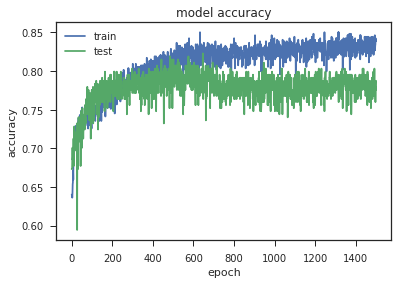

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Training Set Accuracy

In [ ]:
scores = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

514/514 [==============================] - 0s 34us/step

acc: 83.85%


In [ ]:
predictions1 = model.predict(X_test)
# round predictions
rounded1 = [np.round(values) for values in predictions1]



In [ ]:
accuracy1 = accuracy_score(y_test, rounded1)


### Test Results Accuracy

In [ ]:
print("Accuracy: %.2f%%" % (accuracy1 * 100.0))


Accuracy: 80.71%


## 2. XG Boost Classifier

In [49]:
model2 = XGBClassifier()


In [50]:
model2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

### Model Accuracy: 

In [52]:
y_pred3 = model2.predict(X_test)
from sklearn.metrics import accuracy_score
predictions3 = [np.round(value) for value in y_pred3]
accuracy = accuracy_score(y_test, predictions3)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 77.95%


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
